In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data, val_data, test_data = tfds.load("fashion_mnist",
                                            #split=['train[10000:]', 'train[0:10000]', 'test'],
                                            split=['train[20%:]', 'train[0%:20%]', 'test'],
                                            as_supervised=True)

def helper(ds):
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x) / 255.0, np.asarray(y)

train_images, train_labels = helper(train_data)
val_images, val_labels = helper(val_data)
test_images, test_labels = helper(test_data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteC28HTC/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteC28HTC/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
print(train_images.shape, train_labels.shape)

(48000, 28, 28, 1) (48000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
#model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
opt1 = tf.keras.optimizers.SGD(learning_rate=1)
opt2 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.975,nesterov=True)

model.compile(optimizer=opt2,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, validation_data=[val_images, val_labels], epochs=10)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5420 - accuracy: 0.8071 - val_loss: 0.4607 - val_accuracy: 0.8386
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4341 - accuracy: 0.8450 - val_loss: 0.5071 - val_accuracy: 0.8191
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4140 - accuracy: 0.8511 - val_loss: 0.4641 - val_accuracy: 0.8405
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3950 - accuracy: 0.8570 - val_loss: 0.4307 - val_accuracy: 0.8550
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3732 - accuracy: 0.8646 - val_loss: 0.4004 - val_accuracy: 0.8541
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3604 - accuracy: 0.8689 - val_loss: 0.3808 - val_accuracy: 0.8692
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3527 - accuracy: 0.8720 - val_loss: 0.4325 - val_accuracy:

Text(0.5, 0, 'epochs')

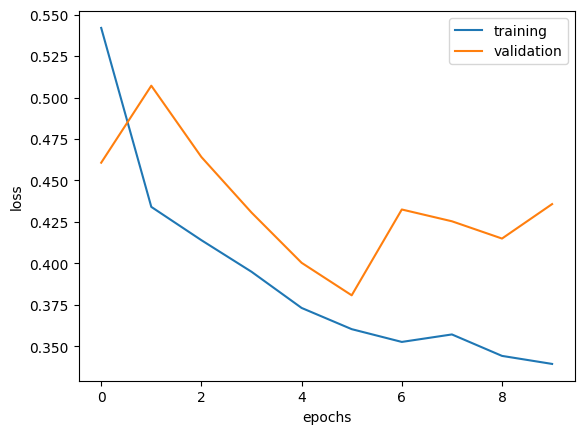

In [9]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.8375


[0.4685187041759491, 0.8374999761581421]

In [11]:
y_pred = model.predict(test_images)
y_pred = np.asarray([np.argmax(y) for y in y_pred])

313/313 [==============================] - 1s 1ms/step


## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
conf_mat = confusion_matrix(y_true=test_labels, y_pred=y_pred)#, normalize='all')

<Axes: >

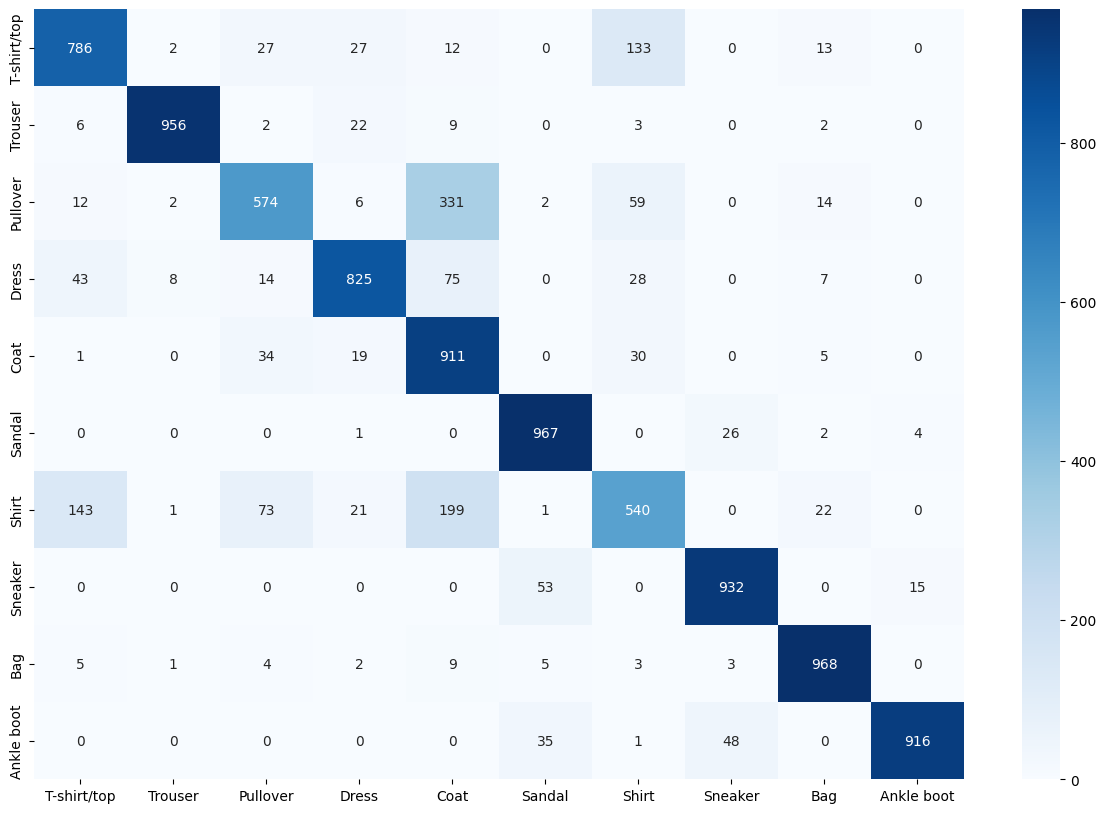

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, ax=ax, annot=True, fmt="g", cmap="Blues", xticklabels=class_names,yticklabels=class_names)

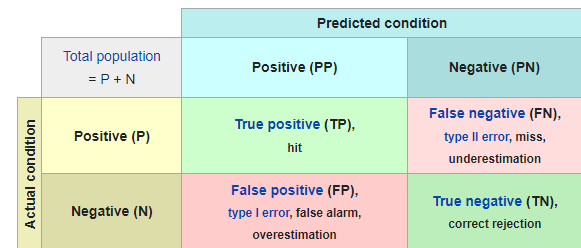

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

### **Precision**
$precision = \frac{TP} {TP + FP}$

### **Recall/Sensitivity/True positive rate**
$recall = \frac{TP} {TP + FN}$

### **Fall-out/False positive rate**
$fallout = \frac{FP} {FP + TN}$

### **Specificity/True negative rate**
$specificity = \frac{TN} {TN + FP}$

### **F1-score (harmonic mean of precision and recall)**
$F1 = \frac{2TP} {2TP + FP + FN}$


In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.99      0.96      0.97      1000
           2       0.79      0.57      0.66      1000
           3       0.89      0.82      0.86      1000
           4       0.59      0.91      0.72      1000
           5       0.91      0.97      0.94      1000
           6       0.68      0.54      0.60      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.97      0.95      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [16]:
# binarize labels to one-hot encoded vectors
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(train_labels)
test_labels_onehot = label_binarizer.transform(test_labels)
test_labels_onehot.shape

(10000, 10)

In [17]:
label_binarizer.transform([2])

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]])

In [18]:
# predict y_pred again
y_pred = model.predict(test_images)
y_pred[0]

313/313 [==============================] - 0s 2ms/step


array([1.2592535e-04, 8.5313941e-06, 3.0145301e-02, 2.0973303e-04,
       9.1159290e-01, 4.3919836e-06, 5.7852618e-02, 2.2711155e-10,
       6.0653165e-05, 4.1081569e-09], dtype=float32)

## **ROC curves**

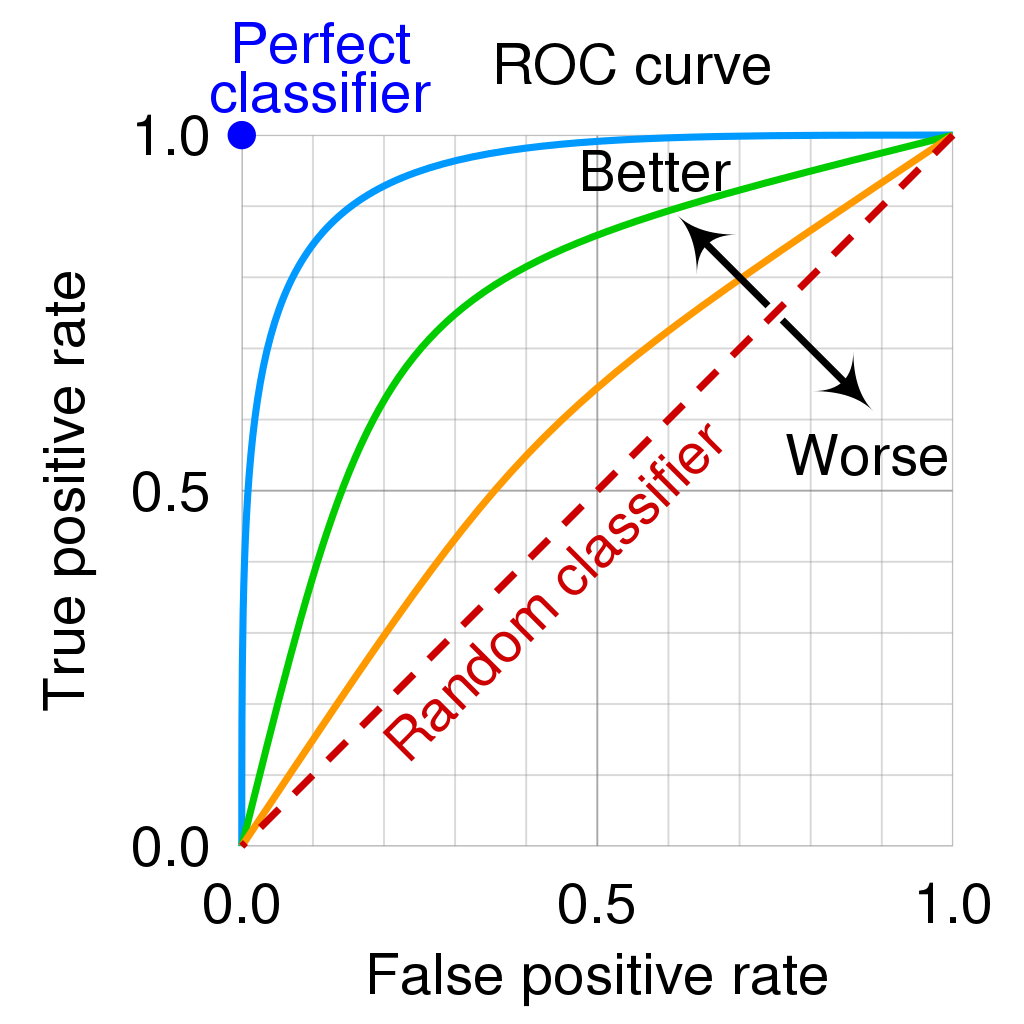

Source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic#/media/File:Roc_curve.svg

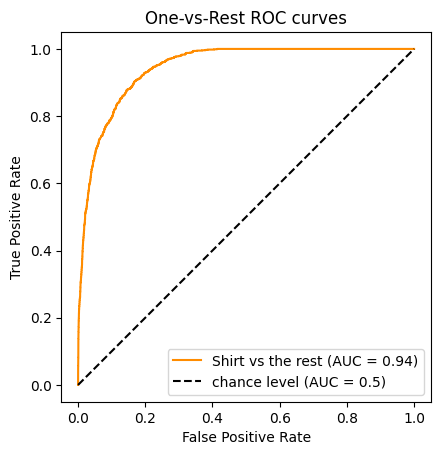

In [19]:
# display ROC curves
from sklearn.metrics import RocCurveDisplay

class_id = 6

RocCurveDisplay.from_predictions(
    test_labels_onehot[:, class_id],
    y_pred[:, class_id],
    name=f"{class_names[class_id]} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

## k-fold Cross Validation

In [20]:
# Merge inputs and targets
inputs = np.concatenate((train_images, val_images, test_images), axis=0)
targets = np.concatenate((train_labels, val_labels, test_labels), axis=0)

inputs.shape

(70000, 28, 28, 1)

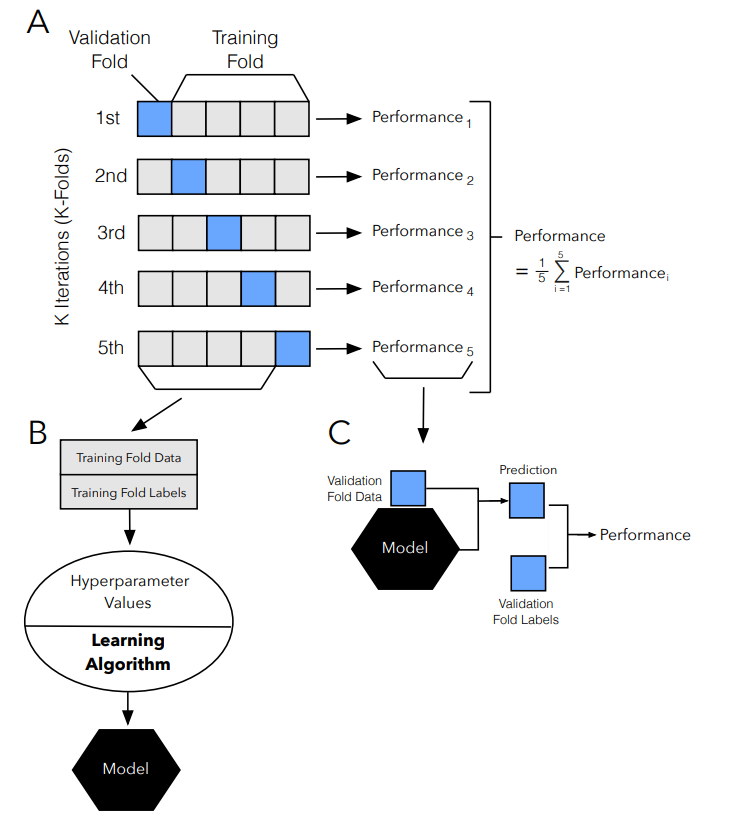

Source: https://arxiv.org/pdf/1811.12808.pdf

In [21]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=7, shuffle=True)

In [25]:
def get_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
  #model.add(tf.keras.layers.Dense(256, activation='relu'))
  #model.add(tf.keras.layers.Dropout(0.1))
  #model.add(tf.keras.layers.Dense(128, activation='relu'))
  #model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))

  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.975, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

In [26]:
acc_per_fold = []
loss_per_fold = []

for idx, (train, test) in enumerate(kfold.split(inputs, targets)):
  model = get_model()

  history = model.fit(inputs[train], targets[train], batch_size=128, epochs=10, verbose=0)
  scores = model.evaluate(inputs[test], targets[test])

  print(f'Score for fold {idx + 1}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

313/313 [==============================] - 1s 4ms/step - loss: 0.3463 - accuracy: 0.8741
Score for fold 1: loss of 0.34626662731170654; accuracy of 87.41000294685364%
313/313 [==============================] - 1s 2ms/step - loss: 0.3654 - accuracy: 0.8752
Score for fold 2: loss of 0.36538323760032654; accuracy of 87.51999735832214%
313/313 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.8715
Score for fold 3: loss of 0.35400649905204773; accuracy of 87.1500015258789%
313/313 [==============================] - 1s 3ms/step - loss: 0.3804 - accuracy: 0.8672
Score for fold 4: loss of 0.38039737939834595; accuracy of 86.72000169754028%
313/313 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.8740
Score for fold 5: loss of 0.3448370695114136; accuracy of 87.40000128746033%
313/313 [==============================] - 1s 4ms/step - loss: 0.3479 - accuracy: 0.8764
Score for fold 6: loss of 0.3478708863258362; accuracy of 87.63999938964844%
3